In [2]:
import os
import pandas as pd
import csv
import time
import matplotlib.pyplot as plt
import numpy as np
import random
import zCurve as z
import math
import re

In [47]:
def get_files_in_folder(folder_path):
    try:
        files = [folder_path + "/" + f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        return files
    except Exception as e:
        print(f"An error occurred while getting files in the folder: {str(e)}")
        return []
    

def get_dot_products(data_files):

    dot_product_matrix = np.zeros((len(data_files), len(data_files)))
    for i, file_path_i in enumerate(data_files):
        if ".csv" not in file_path_i:
            continue

        data = pd.read_csv(file_path_i, sep=";")
        morton = np.array(data['Morton_Index'].tolist())
        morton_normalized_i = morton / np.sqrt(np.dot(morton, morton))

        for j, file_path_j in enumerate(data_files):
            if ".csv" not in file_path_j:
                continue

            data = pd.read_csv(file_path_j, sep=";")
            morton= np.array(data['Morton_Index'].tolist())
            morton_normalized_j = morton / np.sqrt(np.dot(morton, morton))

            dot_product_matrix[i, j] = np.dot(morton_normalized_i, morton_normalized_j)

    return dot_product_matrix

def get_euclidean_distances(data_files):
    distance_matrix = np.zeros((len(data_files), len(data_files)))

    for i, file_path_i in enumerate(data_files):
        if ".csv" not in file_path_i:
            continue

        data = pd.read_csv(file_path_i, sep=";")
        morton_i = np.array(data['Morton_Index'].tolist())

        for j, file_path_j in enumerate(data_files):
            if ".csv" not in file_path_j:
                continue

            data = pd.read_csv(file_path_j, sep=";")
            morton_j= np.array(data['Morton_Index'].tolist())
            

            distance_matrix[i, j] = np.sqrt(np.dot(morton_i - morton_j, morton_i - morton_j))

    return distance_matrix

def plot_heatmap(value_matrix, column_names, title_text):
    
    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(value_matrix)

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(range(len(column_names)), labels=column_names, rotation=45, ha="right", rotation_mode="anchor")
    ax.set_yticks(range(len(column_names)), labels=column_names)
    fig.colorbar(im, shrink=0.6)

    # Loop over data dimensions and create text annotations.
    """
        for i in range(len(column_names)):
        for j in range(len(column_names)):
            text = ax.text(j, i, value_matrix[i, j], ha="center", va="center", color="w")
    """

    ax.set_title(title_text)
    fig.tight_layout()
    plt.show()
    return []

In [15]:
# ===============================
# Get files 
# ===============================
parentFolder = 'results/synthetic_lanechangecitos'
data_files = get_files_in_folder(folder_path=parentFolder)
data_files.sort()
data_files.reverse()
file_basenames = []

for file_path in data_files: 
    if ".csv" not in file_path:
        continue
    basename = os.path.splitext(os.path.basename(file_path))[0]
    file_basenames.append(basename)

In [ ]:
# ===============================
# Compute (opposite) dot product and euclidean distance
# ===============================
dot_products = 1 - get_dot_products(data_files=data_files) 
L2_distances = get_euclidean_distances(data_files=data_files)

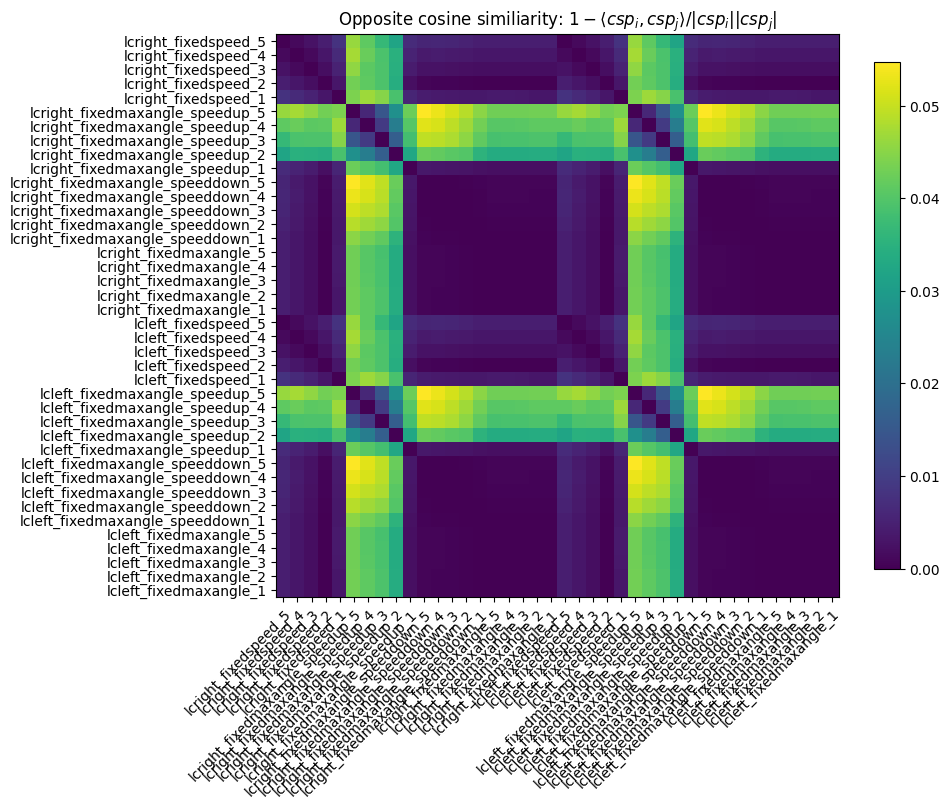

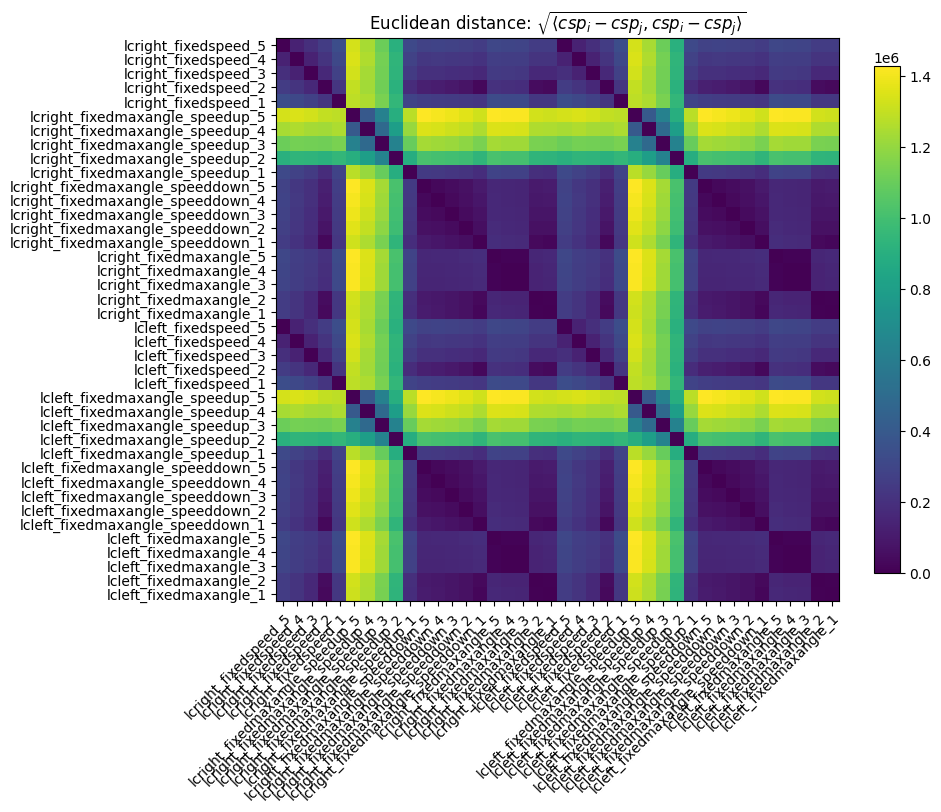

[]

In [ ]:
# ===============================
# Plot results
# ===============================

plot_heatmap(dot_products, column_names=file_basenames,
              title_text='Opposite cosine similiarity: $1 - \\langle csp_i , csp_j \\rangle / |csp_i||csp_j|$')

plot_heatmap(L2_distances, column_names=file_basenames, 
             title_text='Euclidean distance: $\\sqrt{\\langle csp_i-csp_j , csp_i-csp_j \\rangle}$')